In [49]:
import pandas as pd

In [106]:
ndvi_jamaame=pd.read_csv("ndvi-jamaame.csv", index_col=0)
ndwi_jamaame=pd.read_csv("ndwi-jamaame.csv", index_col=0)
ndvi_kismaayo=pd.read_csv("ndvi-kismaayo.csv", index_col=0)
ndvi_poltsamaa=pd.read_csv("ndvi-p6ltsamaa.csv", index_col=0)
ndwi_poltsamaa=pd.read_csv("ndwi-p6ltsamaa.csv", index_col=0)
#Somalia
ndvi_jamaame = ndvi_jamaame.iloc[:, 1]  # NDVI values
ndwi_jamaame = ndwi_jamaame.iloc[:, 1]  # NDWI values
ndvi_kismaayo = ndvi_kismaayo.iloc[:,1]
#Estonia
ndvi_poltsamaa=ndvi_poltsamaa.iloc[:, 1]
ndwi_poltsamaa=ndwi_poltsamaa.iloc[:, 1]  # NDWI values


In [91]:
print(ndvi_jamaame.shape)
print(ndwi_jamaame.shape)
print(ndvi_poltsamaa.shape)
print(ndwi_poltsamaa.shape)
print(ndvi_kismaayo.shape)

(351,)
(351,)
(683,)
(683,)
(352,)


In [92]:
print(ndvi_kismaayo.head())

date
2019-06-17T00:00:00.000Z    0.156545
2019-09-10T00:00:00.000Z    0.163996
2019-12-14T00:00:00.000Z    0.194662
2020-03-18T00:00:00.000Z    0.128885
2020-08-25T00:00:00.000Z    0.145990
Name: avg(band_0), dtype: float64


In [109]:
#The indices of the df (the dates of the data) are in random order, so we have to sort them.
#Soamlia
# Sorting NDVI values by index
sorted_ndvi = ndvi_jamaame.sort_index()

# Sorting NDWI values by index
sorted_ndwi = ndwi_jamaame.sort_index()

df_jamaame=pd.concat([sorted_ndvi,sorted_ndwi], axis=1)

#Estonia
# Sorting NDVI values by index
sorted_ndvi = ndvi_poltsamaa.sort_index()

# Sorting NDWI values by index
sorted_ndwi = ndwi_poltsamaa.sort_index()

df_poltsamaa=pd.concat([sorted_ndvi,sorted_ndwi], axis=1)

df_jamaame.columns = ['NDVI', 'NDWI']
df_poltsamaa.columns = ['NDVI', 'NDWI']


df_kismaayo = ndvi_kismaayo.to_frame().sort_index()

# Rename the only column to 'NDVI'
df_kismaayo = df_kismaayo.rename(columns={df_kismaayo.columns[0]: 'NDVI'})

# Display the updated DataFrame
print(df_kismaayo.head())

print(df_kismaayo.head())
print(df_jamaame.head())
print(df_poltsamaa.head())

print(df_jamaame.head())
print(df_jamaame.shape)
print(df_poltsamaa.head())
print(df_poltsamaa.shape)
print(df_kismaayo.head())

                              NDVI
date                              
2019-01-03T00:00:00.000Z  0.119791
2019-01-08T00:00:00.000Z  0.046816
2019-01-13T00:00:00.000Z  0.036226
2019-01-18T00:00:00.000Z  0.080370
2019-01-23T00:00:00.000Z  0.142664
                              NDVI
date                              
2019-01-03T00:00:00.000Z  0.119791
2019-01-08T00:00:00.000Z  0.046816
2019-01-13T00:00:00.000Z  0.036226
2019-01-18T00:00:00.000Z  0.080370
2019-01-23T00:00:00.000Z  0.142664
                              NDVI      NDWI
date                                        
2019-01-03T00:00:00.000Z  0.205209  0.219616
2019-01-08T00:00:00.000Z  0.266824  0.313082
2019-01-13T00:00:00.000Z  0.110078  0.112421
2019-01-18T00:00:00.000Z  0.289941  0.346885
2019-01-23T00:00:00.000Z  0.286526  0.355312
                              NDVI      NDWI
date                                        
2019-01-02T00:00:00.000Z  0.040186  0.077825
2019-01-05T00:00:00.000Z  0.015675  0.031527
2019-01-07T00:0

In [98]:
# Convert the index to a DateTimeIndex if it's not already
df_jamaame.index = pd.to_datetime(df_jamaame.index)
df_poltsamaa.index = pd.to_datetime(df_poltsamaa.index)

# Group by month and aggregate the data
df_jamaame_monthly = df_jamaame.groupby(pd.Grouper(freq='M')).mean()
df_poltsamaa_monthly = df_poltsamaa.groupby(pd.Grouper(freq='M')).mean()

# Join the DataFrames based on the month
merged_monthly = pd.merge(df_jamaame_monthly, df_poltsamaa_monthly, left_index=True, right_index=True, suffixes=('_jamaame', '_poltsamaa'), how='inner')

print(merged_monthly.head())
print(merged_monthly.shape)

                           NDVI_jamaame  NDWI_jamaame  NDVI_poltsamaa  \
date                                                                    
2019-01-31 00:00:00+00:00      0.229500      0.270622        0.029477   
2019-02-28 00:00:00+00:00      0.203935      0.260080        0.021019   
2019-03-31 00:00:00+00:00      0.185907      0.258782        0.095087   
2019-04-30 00:00:00+00:00      0.177542      0.247276        0.280335   
2019-05-31 00:00:00+00:00      0.079137      0.090439        0.295475   

                           NDWI_poltsamaa  
date                                       
2019-01-31 00:00:00+00:00        0.049899  
2019-02-28 00:00:00+00:00        0.026818  
2019-03-31 00:00:00+00:00        0.113847  
2019-04-30 00:00:00+00:00        0.328918  
2019-05-31 00:00:00+00:00        0.274887  
(59, 4)


In [118]:
# Convert the index to a DateTimeIndex if it's not already
df_kismaayo.index = pd.to_datetime(df_kismaayo.index)
#print

# Group by month and aggregate the data
df_kismaayo_monthly = df_kismaayo.groupby(pd.Grouper(freq='M')).mean()

# Join the DataFrames based on the month
merged_monthly_somalia = pd.merge(df_jamaame_monthly, df_kismaayo_monthly, left_index=True, right_index=True, suffixes=('_jamaame', '_kismaayo'), how='inner')

print(merged_monthly_somalia.head())
print(merged_monthly_somalia.shape)

                           NDVI_jamaame      NDWI  NDVI_kismaayo
date                                                            
2019-01-31 00:00:00+00:00      0.229500  0.270622       0.086471
2019-02-28 00:00:00+00:00      0.203935  0.260080       0.103767
2019-03-31 00:00:00+00:00      0.185907  0.258782       0.089783
2019-04-30 00:00:00+00:00      0.177542  0.247276       0.103825
2019-05-31 00:00:00+00:00      0.079137  0.090439       0.050753
(59, 3)


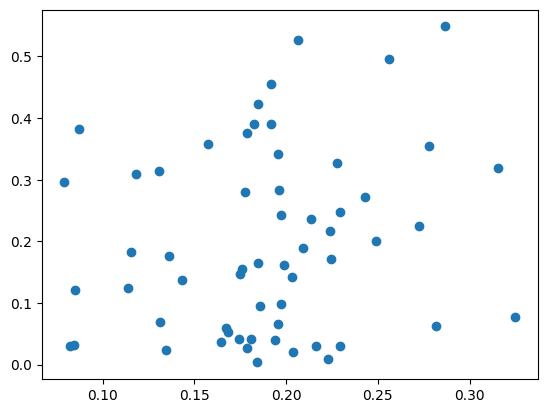

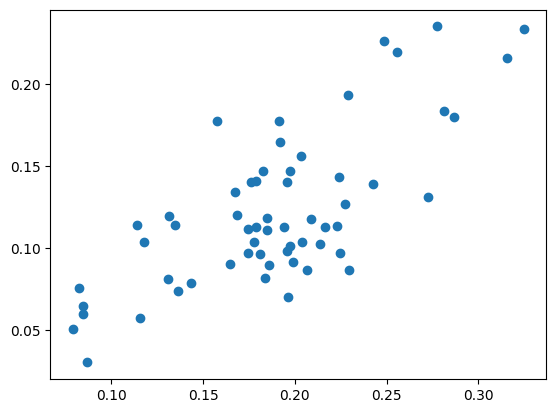

In [113]:
import matplotlib.pyplot as plt

plt.scatter(merged_monthly['NDVI_jamaame'],merged_monthly['NDVI_poltsamaa'])
plt.show()
plt.scatter(merged_monthly_somalia['NDVI_jamaame'],merged_monthly_somalia['NDVI_kismaayo'])


In [ ]:
df_kismaayo = df_kismaayo.to_frame().reset_index()

In [119]:
import scipy.stats
def compute_corr(ts1,ts2):
    # Assuming ndvi_dat and ndwi_dat are Pandas DataFrames or Series
    # Accessing the columns of interest (iloc assumes column index, change as needed)

    # Calculate the correlation coefficient
    correlation_coefficient, p_value = scipy.stats.pearsonr(ts1, ts2)

    print(f"Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")
    
compute_corr(merged_monthly['NDVI_jamaame'],merged_monthly['NDVI_poltsamaa'])
compute_corr(merged_monthly['NDWI_jamaame'],merged_monthly['NDWI_poltsamaa'])
compute_corr(merged_monthly_somalia['NDVI_jamaame'],merged_monthly_somalia['NDVI_kismaayo'])

Correlation Coefficient: 0.18342381785785372
P-value: 0.16434980926351297
Correlation Coefficient: -0.0577401804599009
P-value: 0.6640095730736132
Correlation Coefficient: 0.7341723978506912
P-value: 3.676562922024465e-11


In [70]:
NDVI_mean_jamaame = np.mean(merged_monthly['NDVI_jamaame'])
NDVI_mean_poltsamaa = np.mean(merged_monthly['NDVI_poltsamaa'])

t_stat, p_value = stats.ttest_ind(merged_monthly['NDVI_jamaame'], merged_monthly['NDVI_poltsamaa'])
print("Mean NDVI for Jamaame:", NDVI_mean_jamaame)
print("Mean NDVI for Poltsama", NDVI_mean_poltsamaa)
print("T-statistic:", t_stat)
print("P-value:", p_value)

Mean NDVI for Jamaame: 0.1887557992583183
Mean NDVI for Poltsama 0.19702849885193627
T-statistic: -0.4019496784262492
P-value: 0.6884606910987134


In [115]:
NDVI_mean_jamaame = np.mean(merged_monthly_somalia['NDVI_jamaame'])
NDVI_mean_kismaayo = np.mean(merged_monthly_somalia['NDVI_kismaayo'])

t_stat, p_value = stats.ttest_ind(merged_monthly_somalia['NDVI_jamaame'], merged_monthly_somalia['NDVI_kismaayo'])
print("Mean NDVI for Jamaame:", NDVI_mean_jamaame)
print("Mean NDVI for Kismaayo", NDVI_mean_kismaayo)
print("T-statistic:", t_stat)
print("P-value:", p_value)

Mean NDVI for Jamaame: 0.1887557992583183
Mean NDVI for Kismaayo 0.12213441609097787
T-statistic: 7.035657175588186
P-value: 1.4819633770394726e-10


In [61]:
print(merged_df)

Empty DataFrame
Columns: [NDVI_jamaame, NDWI_jamaame, NDVI_poltsamaa, NDWI_poltsamaa]
Index: []


In [41]:
df_jamaame.index = pd.to_datetime(df_jamaame.index)
#Before the drought
df_2019 = df_jamaame[df_jamaame.index.year == 2019]

# After the drought
df_after_2019 = df_jamaame[df_jamaame.index > '2019-12-31']

In [48]:
import numpy as np
from scipy import stats
# Perform the t-test
mean_ndvi_2019 = np.mean(df_2019['NDVI'])
mean_ndvi_after_2019 = np.mean(df_after_2019['NDVI'])

t_stat, p_value = stats.ttest_ind(df_2019['NDVI'], df_after_2019['NDVI'])

print("Mean NDVI for 2019:", mean_ndvi_2019)
print("Mean NDVI after 2019:", mean_ndvi_after_2019)
print("T-statistic:", t_stat)
print("P-value:", p_value)

Mean NDVI for 2019: 0.18932443894781034
Mean NDVI after 2019: 0.19122767614240738
T-statistic: -0.140638474719631
P-value: 0.8882366875080384


In [ ]:
import matplotlib.pyplot as plt

plt.bar()

In [116]:
df_kismaayo.index = pd.to_datetime(df_kismaayo.index)
#Before the drought
df_2019 = df_kismaayo[df_kismaayo.index.year == 2019]

# After the drought
df_after_2019 = df_kismaayo[df_kismaayo.index > '2019-12-31']

import numpy as np
from scipy import stats
# Perform the t-test
mean_ndvi_2019 = np.mean(df_2019['NDVI'])
mean_ndvi_after_2019 = np.mean(df_after_2019['NDVI'])

t_stat, p_value = stats.ttest_ind(df_2019['NDVI'], df_after_2019['NDVI'])

print("Mean NDVI for 2019:", mean_ndvi_2019)
print("Mean NDVI after 2019:", mean_ndvi_after_2019)
print("T-statistic:", t_stat)
print("P-value:", p_value)

Mean NDVI for 2019: 0.12457216311806615
Mean NDVI after 2019: 0.12388080250630167
T-statistic: 0.07905935788850052
P-value: 0.9370305911927481


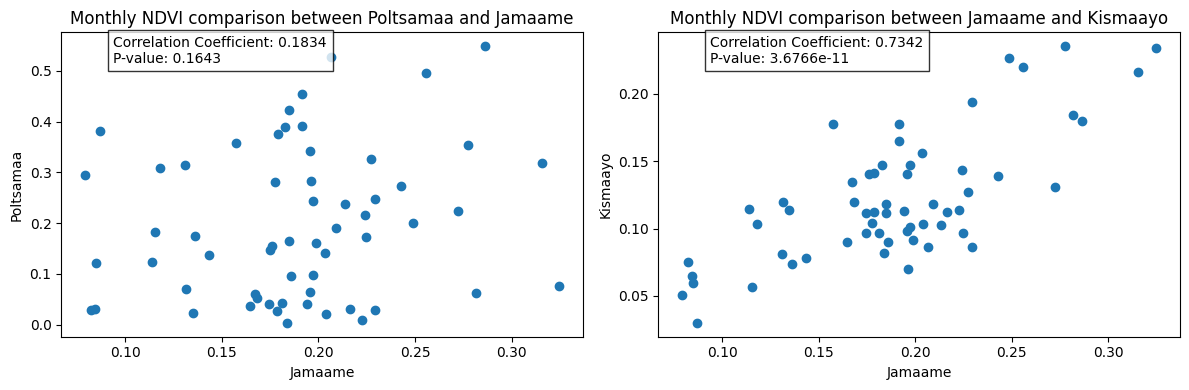

In [120]:
import matplotlib.pyplot as plt

# Assuming merged_monthly and merged_monthly_somalia are the DataFrames with monthly NDVI data

# Calculate correlation values
correlation1 = 0.18342381785785372
p_value1 = 0.16434980926351297
correlation2 = 0.7341723978506912
p_value2 = 3.676562922024465e-11

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for 'Monthly NDVI comparison between Poltsamaa and Jamaame'
axes[0].scatter(merged_monthly['NDVI_jamaame'], merged_monthly['NDVI_poltsamaa'])
axes[0].set_title('Monthly NDVI comparison between Poltsamaa and Jamaame')
axes[0].set_xlabel('Jamaame')
axes[0].set_ylabel('Poltsamaa')

# Annotate the correlation values for the first plot
axes[0].text(0.1, 0.9, f'Correlation Coefficient: {correlation1:.4f}\nP-value: {p_value1:.4f}', 
             transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Plot for 'Monthly NDVI comparison between Jamaame and Kismaayo'
axes[1].scatter(merged_monthly_somalia['NDVI_jamaame'], merged_monthly_somalia['NDVI_kismaayo'])
axes[1].set_title('Monthly NDVI comparison between Jamaame and Kismaayo')
axes[1].set_xlabel('Jamaame')
axes[1].set_ylabel('Kismaayo')

# Annotate the correlation values for the second plot
axes[1].text(0.1, 0.9, f'Correlation Coefficient: {correlation2:.4f}\nP-value: {p_value2:.4e}', 
             transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Display the plots
plt.tight_layout()
plt.show()


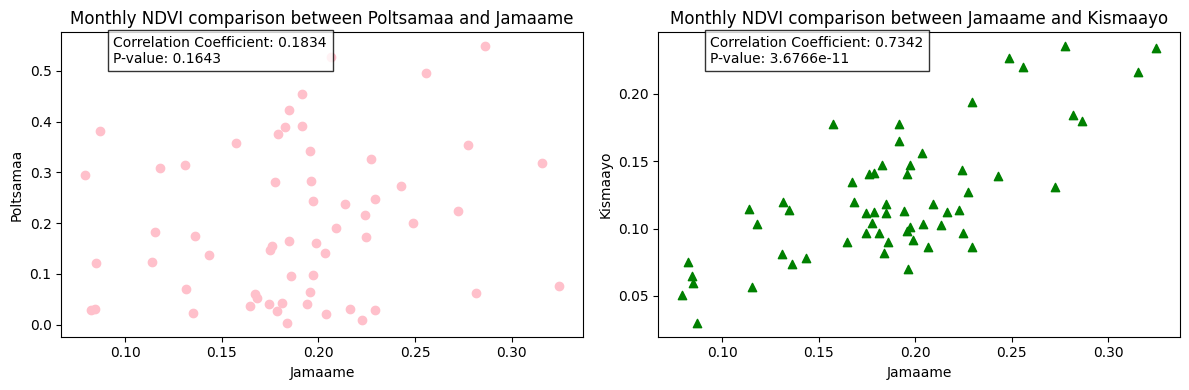

In [121]:
import matplotlib.pyplot as plt

# Assuming merged_monthly and merged_monthly_somalia are the DataFrames with monthly NDVI data

# Calculate correlation values
correlation1 = 0.18342381785785372
p_value1 = 0.16434980926351297
correlation2 = 0.7341723978506912
p_value2 = 3.676562922024465e-11

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for 'Monthly NDVI comparison between Poltsamaa and Jamaame'
axes[0].scatter(merged_monthly['NDVI_jamaame'], merged_monthly['NDVI_poltsamaa'], color='pink', marker='o')
axes[0].set_title('Monthly NDVI comparison between Poltsamaa and Jamaame')
axes[0].set_xlabel('Jamaame')
axes[0].set_ylabel('Poltsamaa')

# Annotate the correlation values for the first plot
axes[0].text(0.1, 0.9, f'Correlation Coefficient: {correlation1:.4f}\nP-value: {p_value1:.4f}', 
             transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Plot for 'Monthly NDVI comparison between Jamaame and Kismaayo'
axes[1].scatter(merged_monthly_somalia['NDVI_jamaame'], merged_monthly_somalia['NDVI_kismaayo'], color='green', marker='^')
axes[1].set_title('Monthly NDVI comparison between Jamaame and Kismaayo')
axes[1].set_xlabel('Jamaame')
axes[1].set_ylabel('Kismaayo')

# Annotate the correlation values for the second plot
axes[1].text(0.1, 0.9, f'Correlation Coefficient: {correlation2:.4f}\nP-value: {p_value2:.4e}', 
             transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Display the plots
plt.tight_layout()
plt.show()


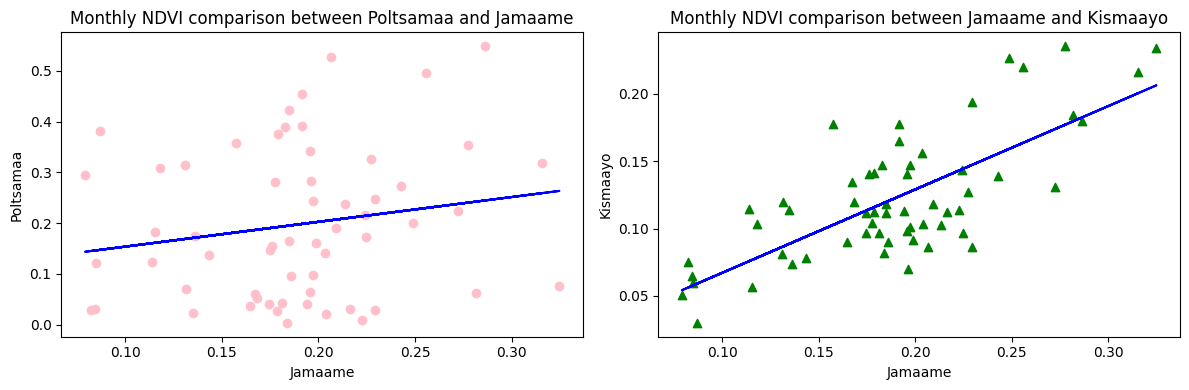

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_monthly and merged_monthly_somalia are the DataFrames with monthly NDVI data

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plots
axes[0].scatter(merged_monthly['NDVI_jamaame'], merged_monthly['NDVI_poltsamaa'], color='pink', marker='o')
axes[1].scatter(merged_monthly_somalia['NDVI_jamaame'], merged_monthly_somalia['NDVI_kismaayo'], color='green', marker='^')

# Perform linear regression and plot the lines
for ax, x, y in zip(axes, [merged_monthly['NDVI_jamaame'], merged_monthly_somalia['NDVI_jamaame']], [merged_monthly['NDVI_poltsamaa'], merged_monthly_somalia['NDVI_kismaayo']]):
    m, b = np.polyfit(x, y, 1)  # Calculate slope and intercept for regression line
    ax.plot(x, m * x + b, color='blue')  # Plot the regression line

# Set titles and labels
axes[0].set_title('Monthly NDVI comparison between Poltsamaa and Jamaame')
axes[1].set_title('Monthly NDVI comparison between Jamaame and Kismaayo')
axes[0].set_xlabel('Jamaame')
axes[0].set_ylabel('Poltsamaa')
axes[1].set_xlabel('Jamaame')
axes[1].set_ylabel('Kismaayo')

# Display the plots
plt.tight_layout()
plt.show()


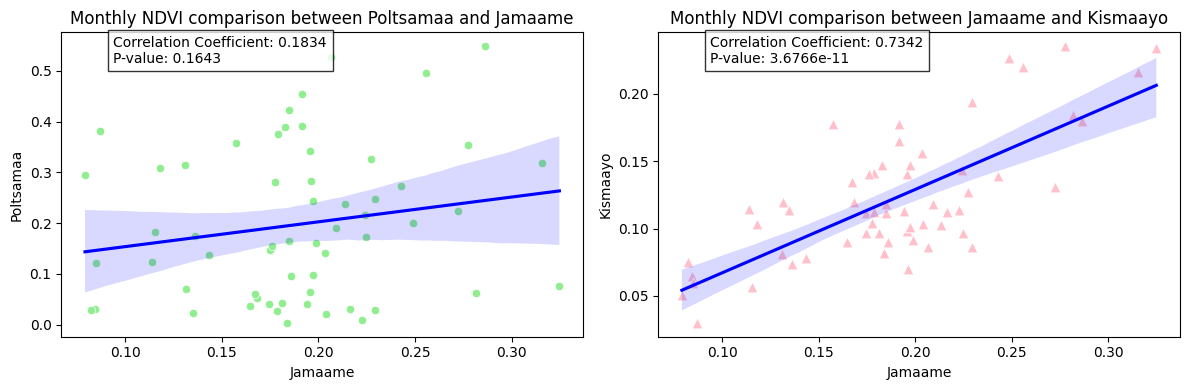

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_monthly and merged_monthly_somalia are the DataFrames with monthly NDVI data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for 'Monthly NDVI comparison between Poltsamaa and Jamaame' using Seaborn
sns.scatterplot(data=merged_monthly, x='NDVI_jamaame', y='NDVI_poltsamaa', ax=axes[0], color='lightgreen', marker='o')
sns.regplot(data=merged_monthly, x='NDVI_jamaame', y='NDVI_poltsamaa', ax=axes[0], scatter=False, color='blue')
axes[0].set_title('Monthly NDVI comparison between Poltsamaa and Jamaame')
axes[0].set_xlabel('Jamaame')
axes[0].set_ylabel('Poltsamaa')

# Plot for 'Monthly NDVI comparison between Jamaame and Kismaayo' using Seaborn
sns.scatterplot(data=merged_monthly_somalia, x='NDVI_jamaame', y='NDVI_kismaayo', ax=axes[1], color='pink', marker='^',s=60)
sns.regplot(data=merged_monthly_somalia, x='NDVI_jamaame', y='NDVI_kismaayo', ax=axes[1], scatter=False, color='blue')
axes[1].set_title('Monthly NDVI comparison between Jamaame and Kismaayo')
axes[1].set_xlabel('Jamaame')
axes[1].set_ylabel('Kismaayo')

# Annotate the correlation values for the first plot
axes[0].text(0.1, 0.9, f'Correlation Coefficient: {correlation1:.4f}\nP-value: {p_value1:.4f}', 
             transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Annotate the correlation values for the second plot
axes[1].text(0.1, 0.9, f'Correlation Coefficient: {correlation2:.4f}\nP-value: {p_value2:.4e}', 
             transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



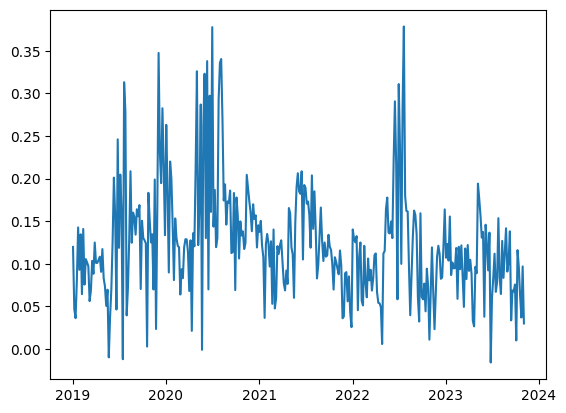

In [129]:
plt.plot(df_kismaayo)

ConversionError: Failed to convert value(s) to axis units: '2020-01-01'

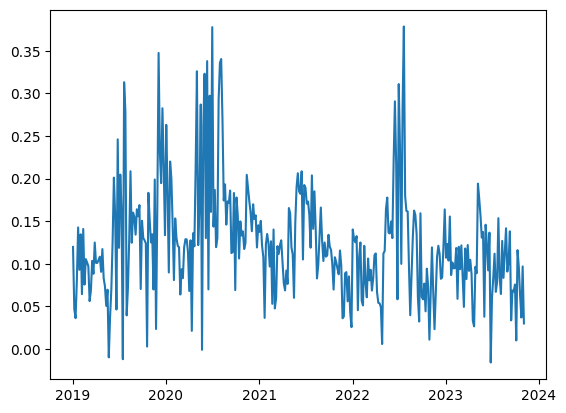

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_monthly and merged_monthly_somalia are the DataFrames with monthly NDVI data
# Assuming df_kismaayo is a DataFrame to visualize a Seaborn plot

# Create the Seaborn scatter plots
# Add your seaborn scatter plot code here...

# Add vertical line for the year 2019
plt.plot(df_kismaayo)
plt.axvline(x='2020-01-01', color='red', linestyle='--', label='Official start of drought')

# Add text annotations
#plt.text('2019-01-01', 0.13, "Mean NDVI for 2019: 0.12457216311806615", color='black')
#plt.text('2019-01-01', 0.125, "Mean NDVI after 2019: 0.12388080250630167", color='black')
#plt.text('2019-01-01', 0.12, "T-statistic: 0.07905935788850052", color='black')
#plt.text('2019-01-01', 0.115, "P-value: 0.9370305911927481", color='black')

plt.show()

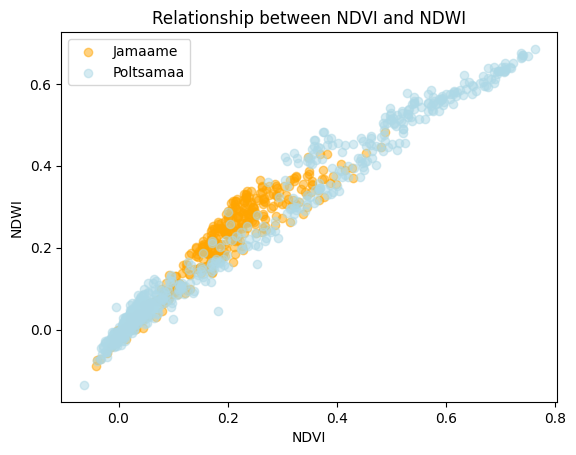

In [161]:
plt.scatter(df_jamaame['NDVI'], df_jamaame['NDWI'], c='orange', alpha=0.5, label='Jamaame')
plt.scatter(df_poltsamaa['NDVI'], df_poltsamaa['NDWI'], c='lightblue', alpha=0.5, label='Poltsamaa')
plt.title('Relationship between NDVI and NDWI')
plt.xlabel('NDVI')
plt.ylabel('NDWI')
plt.legend()
plt.show()

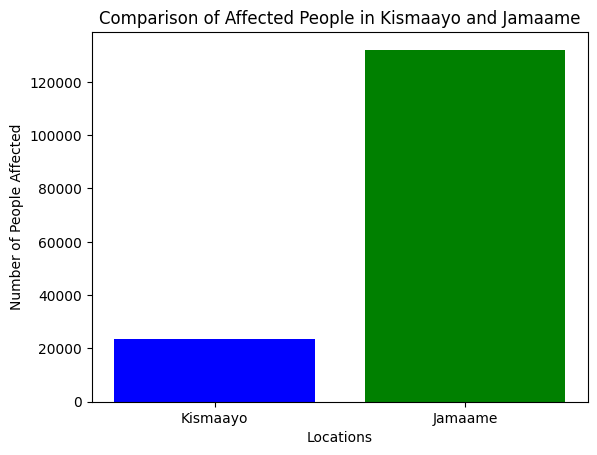

In [157]:
import matplotlib.pyplot as plt

nr_of_people_affected_kismaayo = 23437
nr_affected_jamaame = 132068

# Data
locations = ['Kismaayo', 'Jamaame']
values = [nr_of_people_affected_kismaayo, nr_affected_jamaame]

# Create the bar plot
plt.bar(locations, values, color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Locations')
plt.ylabel('Number of People Affected')
plt.title('Comparison of Affected People in Kismaayo and Jamaame')

# Show the plot
plt.show()